## Landmarks detection




![landmarks](img.png)

### Load and preprocess data

In [1]:
import numpy as np
import pandas as pd
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize

In [34]:
import numpy as np
import pandas as pd
from numpy import array, zeros
from os.path import join
from skimage.color import gray2rgb
from skimage.io import imread
from skimage.transform import resize

file = pd.read_csv('data/gt.csv')
face_points = file[file.columns[1:]]

def load_imgs_and_keypoints(dirname='data'):
    data = pd.read_csv(dirname + '/gt.csv')
    N = data.shape[0]
#     print (data.values[1])
    points_arr = np.array(data[data.columns[1:]].as_matrix(), dtype=np.float32)
    points = np.zeros_like(points_arr, dtype=np.float32)
#     print (points_arr.shape, points.shape)
#     print (len(points_arr[1,:]))
    imgs = np.zeros((N, 100, 100, 3)) #fetching a size of 100 * 100 for image scaling
    for i in range(N):
        img = imread(dirname + '/images/' + data.filename[i])
        w = img.shape[1]
        h = img.shape[0]
        points[i,:] = points_arr[i,:] / np.tile([w,h], 14) - 0.5
        img = resize(img, (100,100,3))
        imgs[i,:,:,:] = img
        if (i % 1000 == 0):
            print ("nombre de pourcent: {0:.2f}%".format((i/N) * 100))
#     print (points[0])
    print ("nombre de pourcent: {0:.2f}%".format((i/N) * 100))
    return imgs, points

imgs, points = load_imgs_and_keypoints()

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


nombre de pourcent: 0.00%
nombre de pourcent: 16.67%
nombre de pourcent: 33.33%
nombre de pourcent: 50.00%
nombre de pourcent: 66.67%
nombre de pourcent: 83.33%
nombre de pourcent: 99.98%


In [35]:
data = pd.read_csv('data/gt.csv')
N = data.shape[0]
#     print (data.values[1])
points_arr = np.array(data[data.columns[1:]].as_matrix(), dtype=np.float32)
print (points_arr.shape)

(6000, 28)


/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


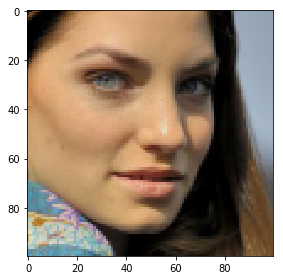

In [36]:
%matplotlib inline
from skimage.io import imshow
imshow(imgs[0])
# points[0]

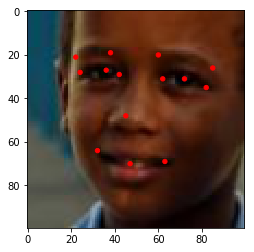

In [37]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

def visualize_points(img, points):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(img)
    
    points_int = np.clip(np.array((points+0.5)*100, dtype=np.int32), 0, 99) #points vector
    
    for i in range(14):
        c = Circle((points_int[2*i], points_int[2*i+1]), radius=1, color='red')
        ax.add_patch(c)
    
visualize_points(imgs[1], points[1])

In [38]:
from sklearn.model_selection import train_test_split
imgs_train, imgs_val, points_train, points_val = train_test_split(imgs, points, test_size=0.1)

[ 0.27659574 -0.28723404  0.11702128 -0.30851063 -0.10638298 -0.29787233
 -0.35106382 -0.23404256  0.25531915 -0.21276596  0.13829787 -0.22340426
  0.07446808 -0.20212767 -0.12765957 -0.18085106 -0.22340426 -0.18085106
 -0.32978722 -0.14893617  0.04255319 -0.0106383   0.17021276  0.14893617
  0.0212766   0.20212767 -0.13829787  0.19148937]


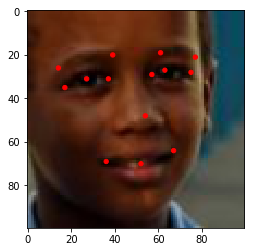

In [39]:
def flip_img(img, points):
    flip_image = img[:,::-1,:]
    
    flip_points = np.copy(points)
    
    for i in range(14):
        flip_points[2*i] = -points[2*i]
    return flip_image, flip_points

f_img, f_points = flip_img(imgs[1], points[1])
print (f_points)
visualize_points(f_img, f_points)

In [40]:
from PIL import Image
import imutils
from random import randint
import cv2 as cv

<h1>Data augmentation</h1>

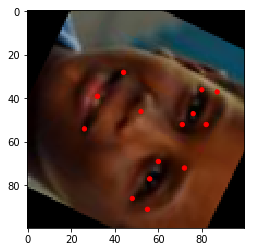

In [41]:
def rotate_via_numpy(x, y, radians):
    c, s = np.cos(radians), np.sin(radians)
    j = np.matrix([[c, s], [-s, c]])
    m = np.dot(j, [x, y])

    return float(m.T[0]), float(m.T[1])

def rotate_random_img(img, points):
    rotate_points = np.copy(points)
    it = iter(rotate_points) 
    pi = 22/7
    degree = randint(0, 360)
    rotate_img = imutils.rotate(img, degree)

    for ind, point in enumerate(it):
        radians = degree * (pi/180)
        x, y = rotate_via_numpy(point, next(it), radians)
        rotate_points[ind * 2] = x
        rotate_points[ind * 2 + 1] = y
        
#     rotate_points = [float(0)] * 28
    return rotate_img, rotate_points 

nb = randint(0, len(imgs))
r_img, r_points = rotate_random_img(imgs[1], points[1])
visualize_points(r_img, r_points)

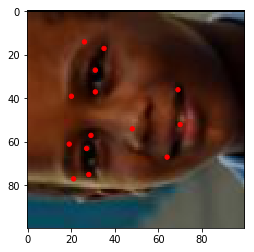

In [42]:
def rotate_left_img(img, points):
    rotate_points = np.copy(points)
    it = iter(rotate_points) 
    pi = 22/7
#     degree = randint(0, 360)
    degree = 90
    rotate_img = imutils.rotate(img, degree)

    for ind, point in enumerate(it):
        radians = degree * (pi/180)
        x, y = rotate_via_numpy(point, next(it), radians)
        rotate_points[ind * 2] = x
        rotate_points[ind * 2 + 1] = y
        
#     rotate_points = [float(0)] * 28
    return rotate_img, rotate_points 

nb = randint(0, len(imgs))
r_img, r_points = rotate_left_img(imgs[1], points[1])
visualize_points(r_img, r_points)

81


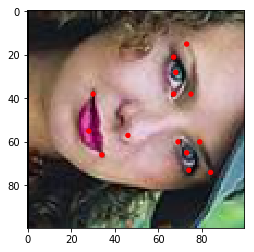

In [43]:
def rotate_right_img(img, points):
    rotate_img = imutils.rotate(img, -90)
    
    rotate_points = np.copy(points)
    it = iter(rotate_points) 
    for ind, point in enumerate(it):
        pi=22/7
        degree = -90
        radians = degree * (pi/180)
        x, y = rotate_via_numpy(point, next(it), radians)
        rotate_points[ind * 2] = x
        rotate_points[ind * 2 + 1] = y
        
#     rotate_points = [float(0)] * 28
    return rotate_img, rotate_points 
nb = randint(0, len(imgs))
print (nb)
r_img, r_points = rotate_right_img(imgs[nb], points[nb])
visualize_points(r_img, r_points)

In [44]:
# nb = 4
# n = imgs_train.shape[0]

# aug_imgs_train = np.zeros((nb*n, 100, 100, 3))
# aug_points_train = np.zeros((nb*n, 28))

# for i in range(n):
#     aug_imgs_train[nb*i] = imgs_train[i]
#     aug_points_train[nb*i] = points_train[i]
    
#     f_img, f_points = flip_img(imgs_train[i], points_train[i]) #flipping all 'count' number of images
#     r1_img, r1_points = rotate_right_img(imgs_train[i], points_train[i])
#     r2_img, r2_points = rotate_left_img(imgs_train[i], points_train[i])
    
#     aug_imgs_train[nb*i+1] = f_img
#     aug_points_train[nb*i+1] = f_points
    
#     aug_imgs_train[nb*i+2] = r2_img
#     aug_points_train[nb*i+2] = r2_points
    
#     aug_imgs_train[nb*i+3] = r1_img
#     aug_points_train[nb*i+3] = r1_points

In [45]:
nb = 2
n = imgs_train.shape[0]

aug_imgs_train = np.zeros((nb*n, 100, 100, 3))
aug_points_train = np.zeros((nb*n, 28))

for i in range(n):
    aug_imgs_train[nb*i] = imgs_train[i]
    aug_points_train[nb*i] = points_train[i]
    
    r1_img, r1_points = rotate_right_img(imgs_train[i], points_train[i])
    
    aug_imgs_train[nb*i+1] = r1_img
    aug_points_train[nb*i+1] = r1_points

In [46]:
# # Write your code here
# nb = 2
# n = imgs_train.shape[0]
# print (imgs_train.shape[0])
# # n = 6000
# aug_imgs_train = np.zeros((nb*n, 100, 100, 3))
# aug_points_train = np.zeros((nb*n, 28))

# for i in range(n):
# #     aug_imgs_train[nb*i] = imgs_train[i]
# #     aug_points_train[nb*i] = points_train[i]
    
# #     f_img, f_points = flip_img(imgs_train[i], points_train[i]) #flipping all 'count' number of images
#     r1_img, r1_points = rotate_random_img(imgs_train[i], points_train[i])
#     r2_img, r2_points = rotate_random_img(imgs_train[i], points_train[i])
# #     r3_img, r3_points = rotate_random_img(imgs_train[i], points_train[i])
    
# #     aug_imgs_train[nb*i+1] = f_img
# #     aug_points_train[nb*i+1] = f_points
    
#     aug_imgs_train[nb*i] = r1_img
#     aug_points_train[nb*i] = r1_points
    
#     aug_imgs_train[nb*i+1] = r2_img
#     aug_points_train[nb*i+1] = r2_points
    
# #     aug_imgs_train[nb*i+2] = r3_img
# #     aug_points_train[nb*i+2] = r3_points

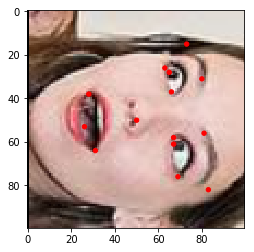

In [47]:
nb = randint(0, len(imgs))
visualize_points(aug_imgs_train[nb], aug_points_train[nb])

In [48]:
print (len(aug_imgs_train), len(aug_points_train))

10800 10800


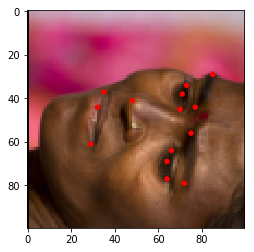

In [49]:
from random import randint
i = randint(0, 10800)
visualize_points(aug_imgs_train[i], aug_points_train[i])

### Network architecture and training

In [50]:
import keras.backend.tensorflow_backend as K
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D,LeakyReLU,Dropout,Flatten,BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.models import Sequential
K.clear_session()

In [51]:
# to free space in memory
del imgs 
del points
del imgs_train
del points_train

In [52]:
model = Sequential()
print (aug_imgs_train[1].shape)
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid',
                 activation='relu', input_shape=aug_imgs_train[1].shape))
model.add(Conv2D(filters=32,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(Conv2D(filters=64,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(Conv2D(filters=128,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=256,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(Conv2D(filters=256,  kernel_size=(3,3), padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=512,  kernel_size=(3,3), padding='valid',
#                  activation='relu'))
# model.add(Conv2D(filters=512,  kernel_size=(3,3), padding='valid',
#                  activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=28))

(100, 100, 3)


In [53]:
# from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD, Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)
filepath = '../model/perso/perso_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
checkpoint = ModelCheckpoint(filepath,
                             monitor='val_loss',
                             verbose=1,
#                              save_best_only=True,
                             mode='min')

early = EarlyStopping(monitor='val_loss',
                      min_delta=0.001,
                      patience=7, verbose=1,
                      mode='min')

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,
                              patience=1,
                              verbose=1,
                              mode='max',
                              min_lr=0.00001)

# sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mse',
              optimizer=Adam(lr=0.0003,decay=4e-5),
             metrics=['mse', 'mae'])

In [31]:
model.fit(np.array(aug_imgs_train),
          np.array(aug_points_train),
          batch_size=64,
          shuffle=True,
          validation_data=(imgs_val, points_val),
          epochs=10,
          callbacks=[checkpoint, early])

Train on 10800 samples, validate on 600 samples
Epoch 1/10
10800/10800 [==============================] - 370s 34ms/step - loss: 0.0219 - mean_squared_error: 0.0219 - mean_absolute_error: 0.1193 - val_loss: 0.0048 - val_mean_squared_error: 0.0048 - val_mean_absolute_error: 0.0512

Epoch 00001: saving model to ../model/perso/perso_weights.01-0.00.hdf5
Epoch 2/10
10800/10800 [==============================] - 369s 34ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0636 - val_loss: 0.0027 - val_mean_squared_error: 0.0027 - val_mean_absolute_error: 0.0351

Epoch 00002: saving model to ../model/perso/perso_weights.02-0.00.hdf5
Epoch 3/10
10800/10800 [==============================] - 369s 34ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - mean_absolute_error: 0.0519 - val_loss: 0.0020 - val_mean_squared_error: 0.0020 - val_mean_absolute_error: 0.0299

Epoch 00003: saving model to ../model/perso/perso_weights.03-0.00.hdf5
Epoch 4/10
10800/10800 [=============

In [32]:
model.save_weights('model_landmark.hdf5')

In [54]:
model.load_weights('model_landmark.hdf5')

### Visualize results

[23.909906 19.622051 43.575245 21.302032 63.243843 23.383718 82.41132
 26.830017 27.59003  28.304716 35.134037 28.550901 41.749546 30.247152
 63.531746 32.853844 70.449425 33.37497  77.379524 34.749786 50.334805
 52.37643  34.85616  66.15546  48.61266  68.25127  61.717712 69.678566]


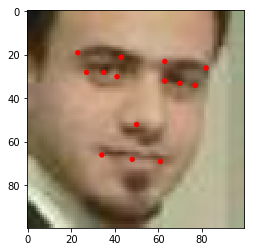

In [55]:
# Example of output
from random import randint
i = randint(0, 599)
img = imgs_val[i:i+1]
img_points = points_val[i:i+1]
pred_points = model.predict(img)[0]
visualize_points(img[0], pred_points)
print((pred_points+0.5)*100)

In [56]:
predicted_keypoints=model.predict(imgs_val)

In [ ]:
def visualize_points(img, points):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.imshow(img)
    
    points_int = np.clip(np.array((points+0.5)*100, dtype=np.int32), 0, 99) #points vector
    
    for i in range(14):
        c = Circle((points_int[2*i], points_int[2*i+1]), radius=1, color='red')
        ax.add_patch(c)

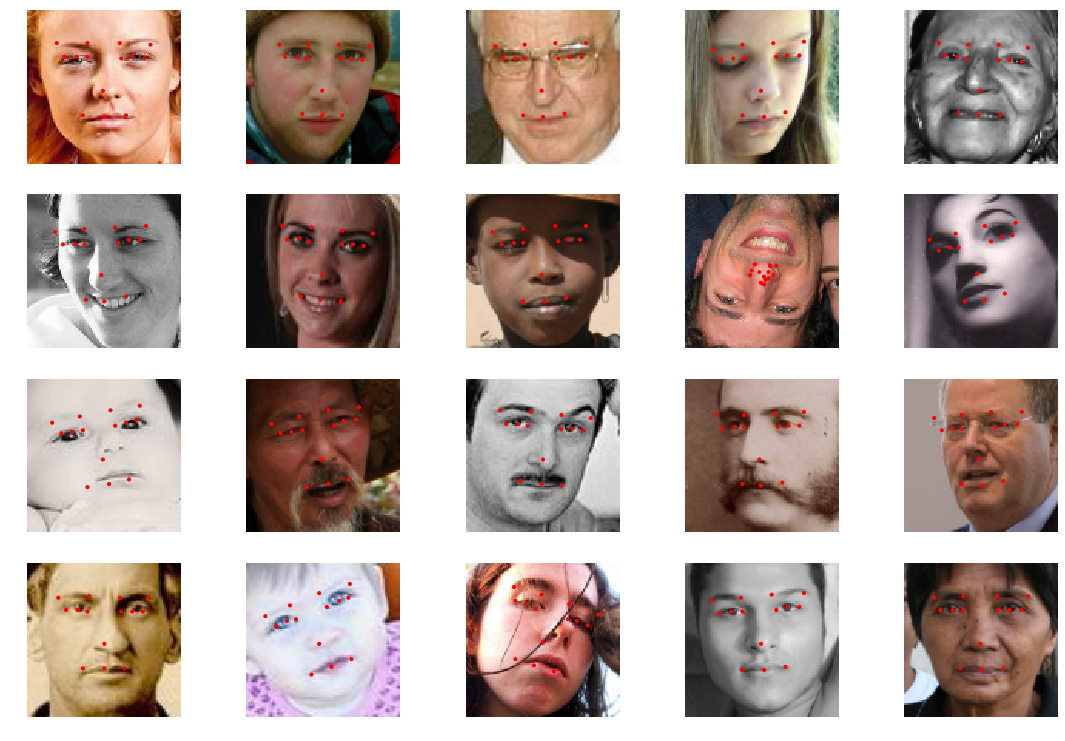

In [92]:
cols = 5
rows = 4
ind = 0
#pour allouer un cadre
# randomLst = []
# for i in range(0, (cols * rows)):
#     randomLst.append(np.random.randint(0, len(labeled_files)))
fig = plt.figure(figsize=(4 * cols - 1, 3.5 * rows - 1))
for index in range(cols):
    for j in range(rows):
        ax = fig.add_subplot(rows, cols, index * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ix=np.random.choice(range(imgs_val.shape[0]))
        img = imgs_val[ix]
        pts = predicted_keypoints[ix]
        points_int = np.clip(np.array((pts+0.5)*100, dtype=np.int32), 0, 99)
        for val in range(14):
            c = Circle((points_int[2*val], points_int[2*val+1]), radius=1, color='red')
            ax.add_patch(c)
        ax.imshow(img)
plt.show()

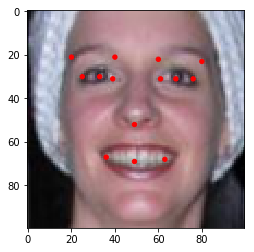

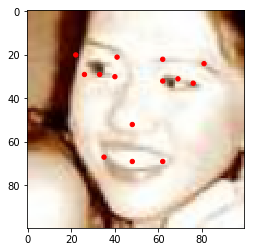

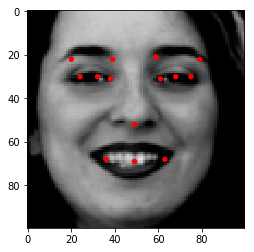

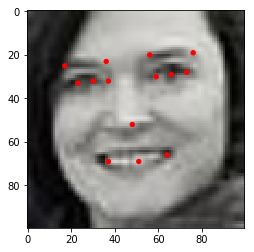

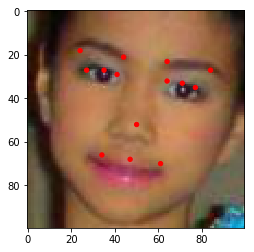

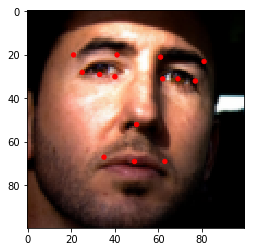

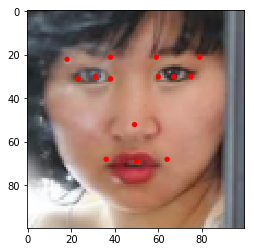

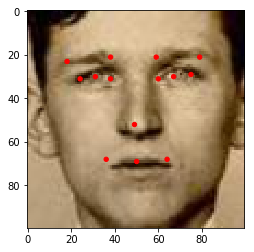

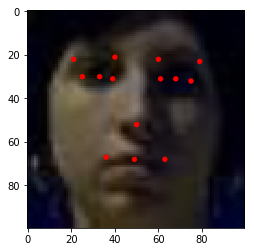

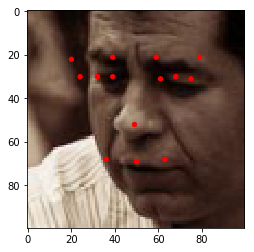

In [62]:
for i in range(10):
    ix=np.random.choice(range(imgs_val.shape[0]))
    visualize_points(imgs_val[ix],predicted_keypoints[ix])